# Plots and Visualizations in Julia

## Plots.jl - An overview

-   Meta-package for plotting
    -   provides a common front-end to (almost) all of Julia’s
        visualization packages
    -   simple starting point
-   Other plotting packages provided as backends
    -   easy switching
    -   individual packages may offer more functionality

In [1]:
using Plots

## Building basic plots

-   basic function: `plot()`
-   arguments: `x`, `y`, possibly `z`
    -   `x` as points
    -   `y` as points or a function
-   keyword arguments can be used to customize

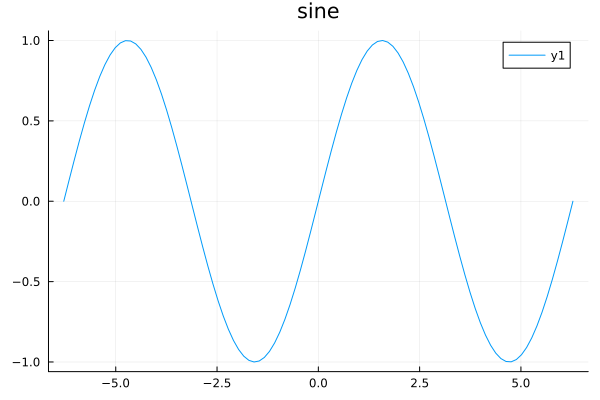

In [2]:
x = LinRange(-2π, 2π, 100)
plot(x, sin, title="sine")

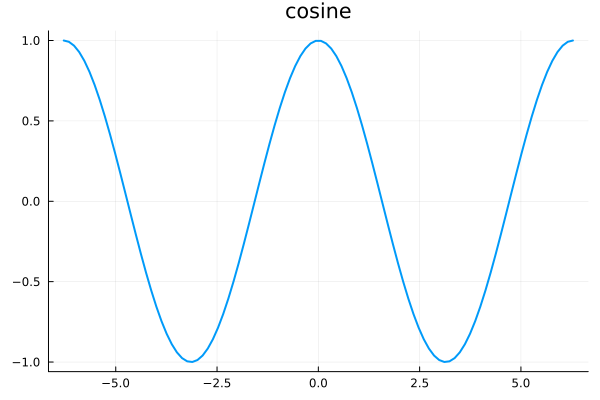

In [3]:
plot(x, cos, title="cosine", linewidth=2, label=false)

### Scatter plots

-   Argument `seriestype` controls type of plot

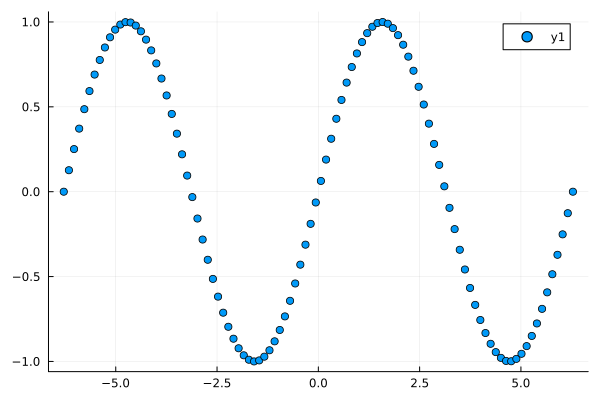

In [4]:
plot(x, sin, seriestype=:scatter)

-   For common series types, corresponding plot functions are provided
    (e.g., `scatter()`)

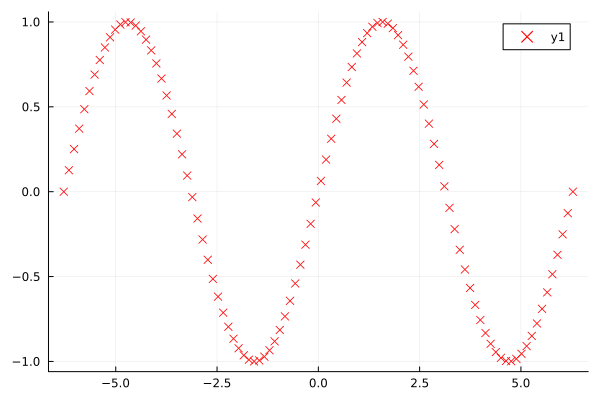

In [5]:
scatter(x, sin, marker=:x, markercolor="red")

### Bar plots

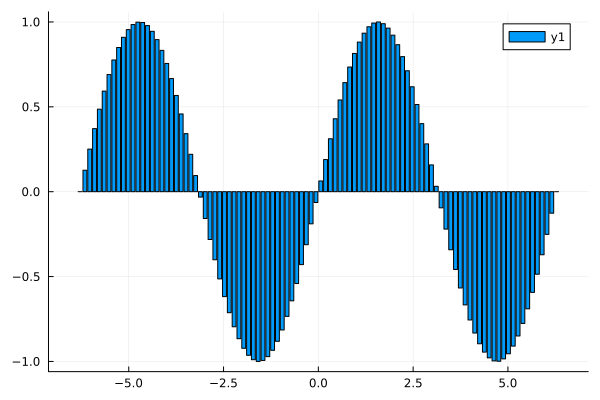

In [6]:
bar(x, sin)

### Quiver plots

-   Slightly more complex example: `quiver()`
    -   draws arrows at given location
    -   arrow direction given by keyword argument `quiver`
-   Example: plot sine function plus derivative as arrows

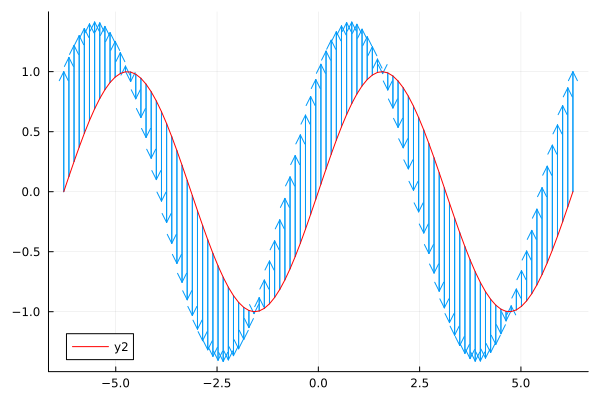

In [7]:
quiver(x, sin, quiver=(zeros(length(x)), cos.(x)))
plot!(x, sin, color="red")

## Building plots incrementally

-   For complex plots, commands can become quite long (many arguments)
-   More readable format: build plots incrementally
    -   many plot functions have equivalent with trailing `!`, which
        adjust current plot
    -   add several plots on top of each other, then adjust arguments

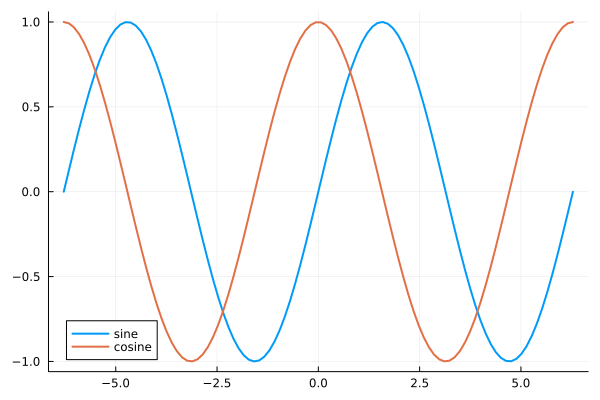

In [8]:
plot(x, sin, label="sine", linewidth=2)
plot!(x, cos, label="cosine", linewidth=2)

### Adding the basics

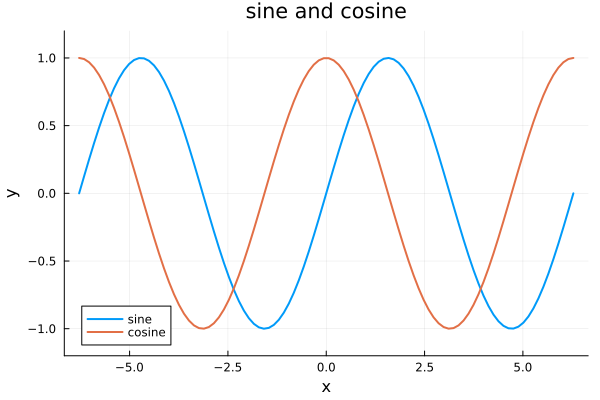

In [9]:
title!("sine and cosine")
xlabel!("x")
ylabel!("y")
ylims!(-1.2, 1.2)

### Annotations

-   Function `annotate!(x, y, text)` can be used to place text in plots

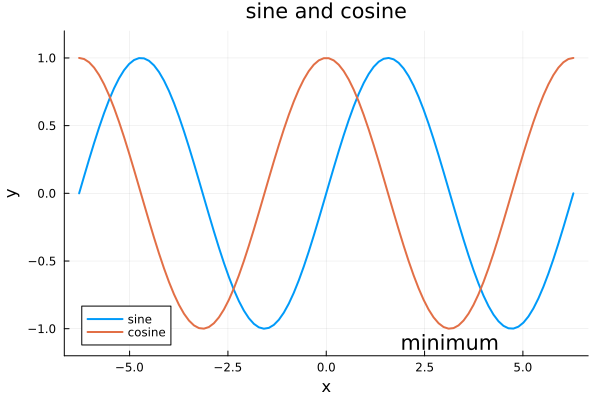

In [10]:
annotate!(π, -1.1, "minimum")

## Multiple plots

-   Simple method to combine several subplots:
    -   assign each plot to a variable
    -   `plot()` the list of plots
    -   use keyword argument `layout` to specify a format

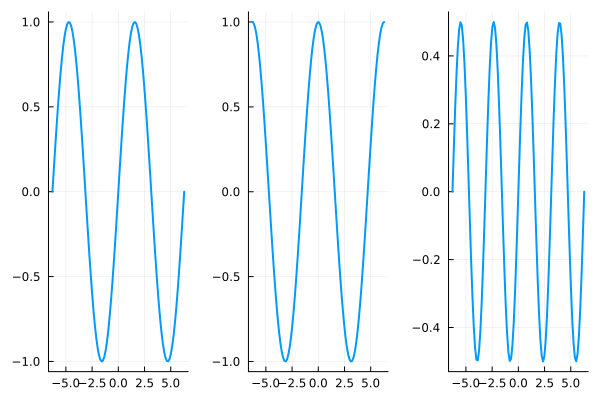

In [11]:
p₁ = plot(x, sin, linewidth=2, label=false)
p₂ = plot(x, cos, linewidth=2, label=false)
p₃ = plot(x, sin.(x) .* cos.(x), linewidth=2, label=false)
plot(p₁, p₂, p₃, layout=(1,3))

### Complex layouts

-   Macro `@layout` can be used to create complicated arrangements
    -   create nested array of plots
    -   additional arguments in curly brackets, e.g., do customize
        height and width

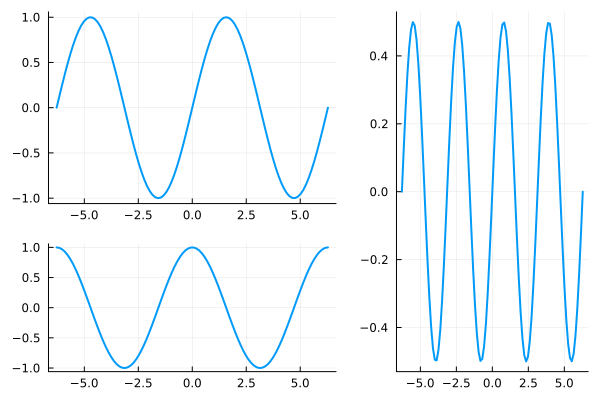

In [12]:
l = @layout [[a{0.6h}; b] c{0.4w}]
plot(p₁, p₂, p₃, layout=l)

## Recipies

-   Recipes are a generic way of defining new visualizations
    -   new plotting commands
    -   plots for new datatypes
-   Makes it easy for other packages to make their types plottable (with
    all Plots.jl backends)

In [13]:
struct MyData
    x::Vector{Float64}
    y::Vector{Float64}
end

data = MyData(rand(10), rand(10))

MyData([0.5278831871260953, 0.8238927201286095, 0.5797451619898616, 0.08971771973127074, 0.12130449992823045, 0.40730124334891527, 0.7449592378994497, 0.7770213973712572, 0.2856179256756868, 0.8601648739187862], [0.9047382038449285, 0.607961224622294, 0.09067036604870404, 0.7368127175855589, 0.26972268924258735, 0.3998554923756452, 0.415384277255866, 0.2138771480895596, 0.6018184991606474, 0.5256164708807163])

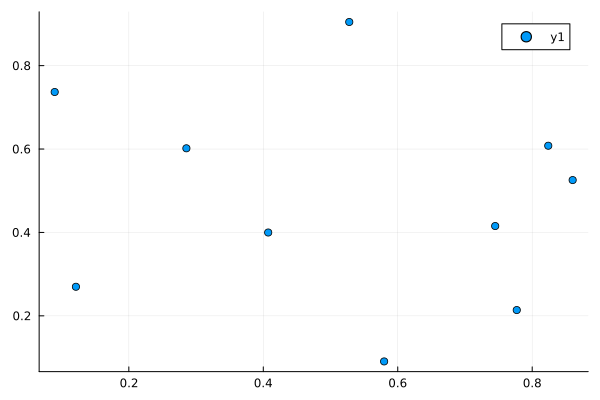

In [14]:
@recipe f(data::MyData) = (data.x, data.y)

scatter(data)

## Themes with PlotThemes.jl

-   Appearances of plots can be customized with keyword arguments
-   Easier way to control many aspects: using themes from
    `PlotThemes.jl`
    -   set current default theme with `theme()` function
    -   to see what a theme looks like, use `showtheme()`

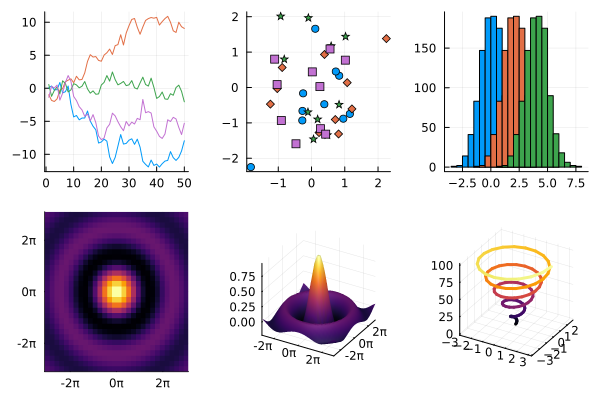

In [15]:
showtheme(:default)

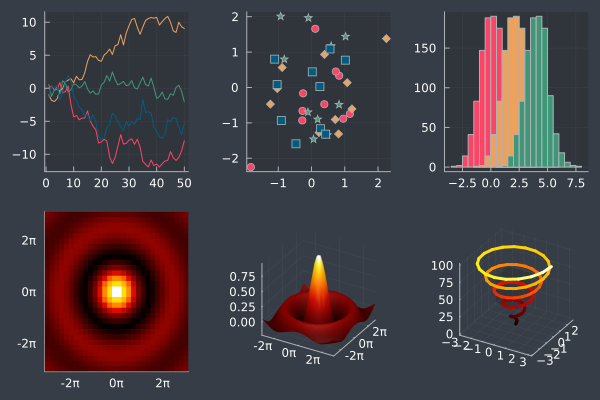

In [16]:
showtheme(:dark)

## Animations

-   Animations can be constructed with the `@animate` and `@gif` macros
    -   `@animate` creates an `Animation` object that can be processed
        further
    -   `@gif` generates a .gif file (and displays it in `IJulia`)
-   Syntax: create plots in a loop

[ Info: Saved animation to Z:\Studium\Master_SE\Semester_01\Computer_Vision_1\Assignment_01\tmp.gif


Plots.AnimatedGif("Z:\\Studium\\Master_SE\\Semester_01\\Computer_Vision_1\\Assignment_01\\tmp.gif")
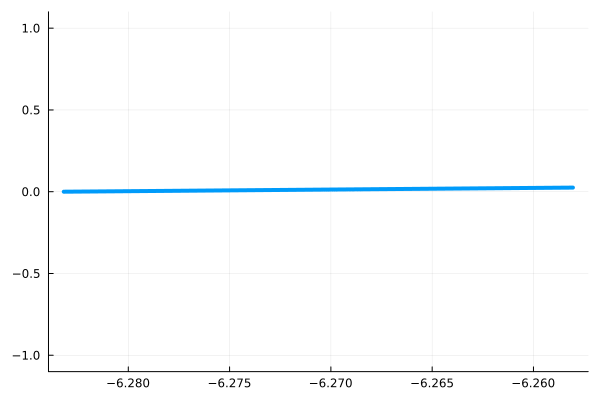

In [17]:
anim = @animate for i in 2:1000
    x = LinRange(-2π, -2π + i * 4π / 1000, i)
    plot(x, sin, ylims=(-1.1, 1.1), linewidth=4, label=false)
end every 5 # only plot every 5th iteration

gif(anim, fps=50)

## Saving plots to file

-   Save plots with the `savefig()` function
    -   to save current plot, just pass filename
    -   file type is chosen automatically based on filename extension
-   To save in specific formats additional functions (like `png()`) are
    provided
-   Supported formats vary by backend, most support png, pdf and svg

## Plotting with different backends

-   Several backends:
    -   `GR` (standard, fast)
    -   `PyPlot` (same as Python)
    -   `Plotly` or `PlotlyJS` (browser compatible)
    -   `UnicodePlots` (terminal compatible)
    -   `PGFPlotsX` (LaTeX output)
-   To choose a backend, install package and call backend function,
    e.g., `plotlyjs()`

In [18]:
plotlyjs()

x = LinRange(-2π, 2π, 100)
y = LinRange(-1, 1, 100)
surface(x, y, sin.(x).*y')

LoadError: ArgumentError: Package PlotlyJS not found in current path.
- Run `import Pkg; Pkg.add("PlotlyJS")` to install the PlotlyJS package.

## Further reading

-   For more details see:
    -   the `Plots.jl` documentation:
        [docs.juliaplots.org](https://docs.juliaplots.org/)
    -   `Plots.jl` cheat sheet:
        [github.com/sswatson/cheatsheets](https://github.com/sswatson/cheatsheets/blob/master/plotsjl-cheatsheet.pdf)
    -   Video tutorial:
        [youtu.be/LGB8GvAL4HA](https://youtu.be/LGB8GvAL4HA)
-   Other interesting packages:
    -   `StatsPlots.jl` with recipies for many useful recipes
    -   `Images.jl` for displaying images
    -   `Makie.jl` is an alternative plotting package